# PyTorch의 Pre-Trained Models
- Transfer Learning은 관련 기능들이 아직 안정화되지 않은 상태이다.

# Pre-Trained 모델 사용하기
- torchvision.models에 이미지/비디오 관련 다양한 모델 제공
  - https://pytorch.org/vision/stable/models.html
  - 사용법이 수시로 변하고 환경마다 에러가 나는 케이스가 있어서 불안정
- timm 라이브러리
  - https://timm.fast.ai/
  - torchvision보다 최신 모델을 사용해볼 수 있다.
  - 여러 SOTA(State-Of-The-Art) models 제공
  - torchvision보다 최신 모델, 가중치 업데이트 및 일부 모델에서 공식 추천
  - torchvision보다 가중치가 알맞게 최적화된 케이스가 많다.
    - 일부 모델은 가중치값을 가져오지 못하고 에러를 낼 수도 있다.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms
from sklearn.model_selection import train_test_split
import numpy as np
from copy import deepcopy

# timm 사용법

In [2]:
!pip install timm

In [3]:
import timm
model_names = timm.list_models(pretrained=True)
print(model_names)

['aimv2_1b_patch14_224.apple_pt', 'aimv2_1b_patch14_336.apple_pt', 'aimv2_1b_patch14_448.apple_pt', 'aimv2_3b_patch14_224.apple_pt', 'aimv2_3b_patch14_336.apple_pt', 'aimv2_3b_patch14_448.apple_pt', 'aimv2_huge_patch14_224.apple_pt', 'aimv2_huge_patch14_336.apple_pt', 'aimv2_huge_patch14_448.apple_pt', 'aimv2_large_patch14_224.apple_pt', 'aimv2_large_patch14_224.apple_pt_dist', 'aimv2_large_patch14_336.apple_pt', 'aimv2_large_patch14_336.apple_pt_dist', 'aimv2_large_patch14_448.apple_pt', 'bat_resnext26ts.ch_in1k', 'beit3_base_patch16_224.in22k_ft_in1k', 'beit3_base_patch16_224.indomain_in22k_ft_in1k', 'beit3_base_patch16_224.indomain_pt', 'beit3_base_patch16_224.pt', 'beit3_large_patch16_224.in22k_ft_in1k', 'beit3_large_patch16_224.indomain_in22k_ft_in1k', 'beit3_large_patch16_224.indomain_pt', 'beit3_large_patch16_224.pt', 'beit_base_patch16_224.in22k_ft_in22k', 'beit_base_patch16_224.in22k_ft_in22k_in1k', 'beit_base_patch16_384.in22k_ft_in22k_in1k', 'beit_large_patch16_224.in22k_ft_

# Pre-Trained 모델 검색

In [4]:
print(timm.list_models('*vit*'))

['convit_base', 'convit_small', 'convit_tiny', 'crossvit_9_240', 'crossvit_9_dagger_240', 'crossvit_15_240', 'crossvit_15_dagger_240', 'crossvit_15_dagger_408', 'crossvit_18_240', 'crossvit_18_dagger_240', 'crossvit_18_dagger_408', 'crossvit_base_240', 'crossvit_small_240', 'crossvit_tiny_240', 'davit_base', 'davit_base_fl', 'davit_giant', 'davit_huge', 'davit_huge_fl', 'davit_large', 'davit_small', 'davit_tiny', 'efficientvit_b0', 'efficientvit_b1', 'efficientvit_b2', 'efficientvit_b3', 'efficientvit_l1', 'efficientvit_l2', 'efficientvit_l3', 'efficientvit_m0', 'efficientvit_m1', 'efficientvit_m2', 'efficientvit_m3', 'efficientvit_m4', 'efficientvit_m5', 'fastvit_ma36', 'fastvit_mci0', 'fastvit_mci1', 'fastvit_mci2', 'fastvit_s12', 'fastvit_sa12', 'fastvit_sa24', 'fastvit_sa36', 'fastvit_t8', 'fastvit_t12', 'flexivit_base', 'flexivit_large', 'flexivit_small', 'gcvit_base', 'gcvit_small', 'gcvit_tiny', 'gcvit_xtiny', 'gcvit_xxtiny', 'levit_128', 'levit_128s', 'levit_192', 'levit_256', 

# create_model(모델명, pretrained=True)
- pretrained=True이면, 학습된 가중치도 가져옴
- num_classes = 10 등으로 out_features를 변경할 수도 있다.

Resnet과 ViT(Vision Transformer)
CNN 등장 후, CNN 기반 모델(Alexnet, VGGNet, ResNet, DenseNet, NasNet, EfficientNet 등)이 주류를 이루었고
SOTA(State-Of-The-Art) 성능을 보여주었음(대표적으로 ResNet)
이런 상황에서 2021년에 Vision Transformer가 등장하며 ImageNet 기준 1, 2위를 차지했다.
Vision Transformer는 최신 자연어 처리 분야에서 가장 좋은 성능을 보여주는 Transformer라는 개념을 Vision 분야에 적용하여
SOTA 성능을 보여주고 있는 최신 모델이다.
해당 모델의 깊은 이해를 위해서는 Sequence-to-Sequence(Seq2Seq), Attention 이해 필요(중급자)

Resnet34, 50, 101
34, 50, 101은 레이어 수로 이해하면 된다.
Google colab에서조차 34레리어로도 학습에 상당한 시간이 걸리므로 가볍게 resnet34로 MNIST를 테스트해본다.

In [5]:
import timm

# create_model(모델명, pretrained=True, in_chans=1, num_classes=10)
model = timm.create_model("resnet50", pretrained=True, in_chans=1, num_classes=10)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

In [6]:
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

# 다양한 모델 변경 가능

In [7]:
# # 모델 변경, 직접 특정 layer의 파라미터를 변경할 수도 있다.
# model.classifier[6].out_features = 10
# # layer 추가(파이썬 문법으로 자유자재로)
# last_layer_for10 = nn.Linear(1000, 10, bias=True)
# final_activation = nn.LogSoftmax(dim=-1)
# model.classifier.append(last_layer_for10)
# final_activation = nn.LogSoftmax(dim=-1)
# model.classifier.append(final_activation)

In [8]:
model.fc = (
    nn.Sequential(
        nn.Linear(2048, 10, bias=True),
        nn.LogSoftmax(dim=-1)
    )
)
model

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act1): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (drop_block): Identity()
      (act2): ReLU(inplace=True)
      (aa): Identity()
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
     

# Pre-Trained Model의 freeze 기법
- 선택적으로 레이어별 가중치 업데이트 또는 freeze 가능

In [9]:
for param in model.parameters():
  param.requires_grad = False

for param in model.parameters():
  param.requires_grad = True

# MNIST with Transfer Learning
- Resnet 등은 보통 3채널 224x224 이미지로 학습되어있다.
- MNIST는 1채널 28x28이므로 Fine Tuning이 필요할 정도이지만,
- Google colab에서조차 학습에 상당한 시간이 걸리므로 우선 resnet34로 MNIST를 테스트해본다.

In [10]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(1)
if device == 'cuda':
  torch.cuda.manual_seed_all(1)
print(device)

model = model.to(device)

cuda


In [11]:
train_rawdata = datasets.MNIST(root = 'dataset_MNIST',
                               train = True, # True면 Train 데이터
                               download = True, # 데이터가 없으면 Download
                               transform = transforms.ToTensor()) # raw 포맷을 텐서로 바꿔줌
test_rawdata = datasets.MNIST(root = 'dataset_MNIST',
                               train = False, # False면 Test 데이터
                               download = True, # 데이터가 없으면 Download
                               transform = transforms.ToTensor()) # raw 포맷을 텐서로 바꿔줌
print('number of training data : ', len(train_rawdata))
print('number of test data : ', len(test_rawdata))

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.93MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 130kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]

number of training data :  60000
number of test data :  10000


In [12]:
VALIDATION_RATE = 0.2
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_rawdata)), # Train 데이터셋의 인덱스 번호 추출(0~59999)
    train_rawdata.targets, # y 정답 라벨
    stratify = train_rawdata.targets, # y 정답 라벨 균등분포
    test_size = VALIDATION_RATE # 여기선 Validation 데이터셋 비율
)

In [13]:
train_dataset = Subset(train_rawdata, train_indices)
validation_dataset = Subset(train_rawdata, val_indices)

In [14]:
print(len(train_dataset), len(validation_dataset), len(test_rawdata))

48000 12000 10000


In [15]:
BATCH_SIZE = 128
train_batchs = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
va_batchs = DataLoader(validation_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_batchs = DataLoader(test_rawdata, batch_size=BATCH_SIZE, shuffle=False)

# input, output, loss, optimizer 설정
- L2 regularization을 사용하기위해 weight decay 값을 설정하면, 가중치 업데이트가 학습 데이터셋에 overfit되지 않도록 가중치 업데이트를 완화하는 효과를 볼 수 있음
- 하지만 Adam은 계산식(gradient 제곱 누적 값의 역수에 루트를 취한것으로 learning rate를 나눠줌)에 weight decay가 포함되면 계산식에 의해 각 step별 weight decay의 영향이 달라질 수 있고 해당 영향이 결국 작아질 수 있다.
- 따라서 AdamW는 weight decay를 분리하여 별도로 적용하는 decoupled weight decay를 사용한다.
- 테스트셋에 대한 일반화 성능을 높이기위해 AdamW를 사용하는 케이스가 많아지고 있다.

In [16]:
loss_func = nn.NLLLoss() # LogSoftmax는 NLLLoss로 진행해야한다.
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0005, weight_decay=0.001) # pre-trained model이므로 lr, weight_decay를 줄여준다.

# Training & Validation

In [17]:
def train_model(model, early_stop, nb_epochs, progress_interval):
    train_losses, valid_losses, lowest_loss = list(), list(), np.inf

    for epoch in range(nb_epochs):
        train_loss, valid_loss = 0, 0

        # train model
        model.train() # prepare model for training
        for x_minibatch, y_minibatch in train_batchs:
            x_minibatch = x_minibatch.to(device)
            y_minibatch = y_minibatch.to(device)
            y_minibatch_pred = model(x_minibatch)
            loss = loss_func(y_minibatch_pred, y_minibatch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss = train_loss / len(train_batchs)
        train_losses.append(train_loss)

        # validate model
        model.eval()
        with torch.no_grad():
            for x_minibatch, y_minibatch in va_batchs:
                x_minibatch = x_minibatch.to(device)
                y_minibatch = y_minibatch.to(device)
                y_minibatch_pred = model(x_minibatch)
                loss = loss_func(y_minibatch_pred, y_minibatch)
                valid_loss += loss.item()

        valid_loss = valid_loss / len(va_batchs)
        valid_losses.append(valid_loss)

        if valid_losses[-1] < lowest_loss:
            lowest_loss = valid_losses[-1]
            lowest_epoch = epoch
            best_model = deepcopy(model.state_dict())
        else:
            if (early_stop > 0) and lowest_epoch + early_stop < epoch:
                print("Early Stopped", epoch, "epochs")
                break

        if (epoch % progress_interval) == 0:
            print(train_losses[-1], valid_losses[-1], lowest_loss, lowest_epoch, epoch)

    model.load_state_dict(best_model)
    return model, lowest_loss, train_losses, valid_losses

# 훈련 실행
- CPU만으로는 테스트가 불가능에 가까우므로 colab을 이용하여 테스트한다.

In [18]:
nb_epochs = 100
progress_interval = 1
early_stop = 10

model, lowest_loss, train_losses, valid_losses = train_model(model, early_stop, nb_epochs, progress_interval)

0.6163128203749657 0.09965417236882321 0.09965417236882321 0 0
0.08621001704782248 0.05726742477929021 0.05726742477929021 1 1
0.04293811289407313 0.048207285531618176 0.048207285531618176 2 2
0.025899146320298314 0.04752908029316112 0.04752908029316112 3 3
0.021081019666045905 0.0488821394652366 0.04752908029316112 3 4
0.014608026331368212 0.039547927614469874 0.039547927614469874 5 5
0.016059437706445655 0.04350598278874036 0.039547927614469874 5 6
0.014013622172138033 0.039089405955003695 0.039089405955003695 7 7
0.011929256287422807 0.03677060728536007 0.03677060728536007 8 8
0.009124931856252563 0.04118063692480296 0.03677060728536007 8 9
0.007606272364539715 0.0368013889793532 0.03677060728536007 8 10
0.009616008097267089 0.039879621060111836 0.03677060728536007 8 11
0.008799529386548481 0.03910475914698451 0.03677060728536007 8 12
0.007643728108562451 0.03841442814712324 0.03677060728536007 8 13
0.007720705654957177 0.03542130983755379 0.03542130983755379 14 14
0.008321907457798

# 테스트셋 기반 Evaluation

In [19]:
test_loss = 0
correct = 0
wrong_samples, wrong_preds, actual_preds = list(), list(), list()

model.eval()
with torch.no_grad():
    for x_minibatch, y_minibatch in test_batchs:
        x_minibatch = x_minibatch.to(device)
        y_minibatch = y_minibatch.to(device)
        y_test_pred = model(x_minibatch)
        test_loss += loss_func(y_test_pred, y_minibatch)
        pred = torch.argmax(y_test_pred, dim=1)
        correct += pred.eq(y_minibatch).sum().item()

        wrong_idx = pred.ne(y_minibatch).nonzero()[:, 0].cpu().numpy().tolist()
        for index in wrong_idx:
            wrong_samples.append(x_minibatch[index].cpu())
            wrong_preds.append(pred[index].cpu())
            actual_preds.append(y_minibatch[index].cpu())

test_loss /= len(test_batchs.dataset)
print('Average Test Loss: {:.4f}'.format(test_loss))
print('Accuracy: {}/{} ({:.2f}%)'.format(correct, len(test_batchs.dataset), 100*correct/len(test_batchs.dataset)))

Average Test Loss: 0.0002
Accuracy: 9937/10000 (99.37%)


# incorrect data만 확인해보기

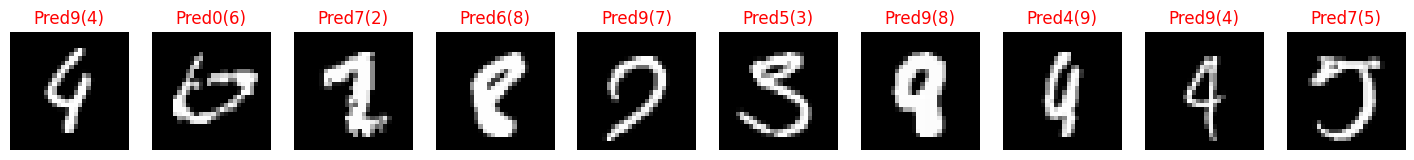

In [22]:
# incorrect 데이터 중 10개 이미지만 출력해보기
import matplotlib.pyplot as plt
# 주피터 노트북에서 그림을 주피터 노트북 내에 표시하도록 강제하는 명령
%matplotlib inline

plt.figure(figsize=(18 , 20))

for index in range(10):
    plt.subplot(10, 10, index + 1)
    plt.axis('off')
    plt.imshow(wrong_samples[index].numpy().reshape(28,28), cmap = "gray")
    plt.title("Pred" + str(wrong_preds[index].item()) + "(" + str(actual_preds[index].item()) + ")", color='red')